# 10

9923081 _ 9923093 _ 40023024

**Table of contents**<a id='toc0_'></a>    
- [Pre-Lab Report](#toc1_)    
- [Simulating the Inverse System with Neural Networks](#toc2_1_)    
  - [Define the System Transfer Function](#toc2_2_)    
  - [Generate Training Data](#toc2_3_)
  - [Neural Network](#toc2_4_1_)
    - [Define a Neural Network](#toc2_4_2_)
    - [Train a Neural Network](#toc2_4_3_)    
  - [Plot training loss](#toc2_5_)    
  - [Noise Addition](#toc2_6_)    
  - [Plot and Compare](#toc2_7_)    
- [New H(s):](#toc3_1_) $H(s) = \frac{40}{s - 1}$

<!-- vscode-jupyter-toc-config
    numbering=false
    anchor=true
    flat=false
    minLevel=1
    maxLevel=6
    /vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Pre-Lab Report](#toc0_)

**1) Inverse Dynamics Control (IDC):**

   - simply, given a desired motion trajectory, IDC calculates the required forces and torques to achieve that motion.
   - The dynamic equation of a robotic manipulator can be represented as:
  $$M(q)q̈ + C(q, q̇)q̇ + g(q) = τ$$
    where:
      M(q): Inertia matrix
      C(q, q̇): Coriolis and centrifugal matrix
      g(q): Gravity vector
      τ: Joint torque vector
      q, q̇, q̈: Joint position, velocity, and acceleration vectors, respectively
      
   - Key steps in IDC:
     - Dynamic Model:
       - Create a mathematical model of the system (e.g., robot arm) that captures its mass, inertia, and other physical properties.
     - Desired Trajectory:
       - Define the desired position, velocity, and acceleration profiles for each joint.
     - Inverse Dynamics Calculation:
       - Use the dynamic model and desired trajectory to solve for the joint torques or forces that will produce the desired motion. This often involves solving a system of equations.
     - Torque/Force Application:
       - Apply the calculated torques or forces to the system's actuators (e.g., motors) to execute the desired motion.
  
**2) Disadvantages of IDC:**
  1. Computational Cost: *The computational cost of solving the inverse dynamics equations can be high, especially for real-time applications with complex systems.*
   
  2. Actuator Limitations: *The calculated torques must be within the physical limits of the actuators. If the calculated torques exceed these limits, the controller may not be able to achieve the desired motion.*
   
  3. Sensitivity to Model Accuracy: *Any inaccuracies in the model can lead to significant errors in the calculated torques, resulting in poor performance.*
   
  4. Sensitivity to Noise and Disturbances: *Noise in sensor measurements and external disturbances can propagate through the inverse dynamics calculations, leading to errors in the calculated torques.*

  5. Lack of Robustness to Model Uncertainties: *In many cases, the performance of IDC can degrade significantly in the presence of significant model uncertainties.*

**3) Solutions to mitigate the disadvantages of IDC:**
  1. Addressing Model Accuracy: *System Identification, Model-Based Learning, Robust Control*
   
  2. Reducing Computational Cost: *Efficient Algorithms, Efficient Algorithms, Efficient Algorithms*

  3. Mitigating Noise and Disturbances: *Efficient Algorithms, Efficient Algorithms, Efficient Algorithms*

  4. Handling Actuator Limitations: *Efficient Algorithms,Efficient Algorithms*

  5. Improving Robustness: *Efficient Algorithms, Efficient Algorithms, Efficient Algorithms*

## <a id='toc2_1_'></a>[Simulating the Inverse System with Neural Networks](#toc0_)

In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

### <a id='toc2_2_'></a>[Define the System Transfer Function](#toc0_)

In [2]:
class SystemModel:
    def __init__(self, gain=40, time_constant=1):
        self.gain = gain
        self.time_constant = time_constant
    
    def output(self, u, dt=0.01):
        y = np.zeros_like(u)
        for t in range(1, len(u)):
            y[t] = y[t-1] + dt * (self.gain * u[t-1] - y[t-1]) / self.time_constant
        return y

$H(s) = \frac{40}{s + 1}$

### <a id='toc2_3_'></a>[Generate Training Data](#toc0_)

In [3]:
time = np.linspace(0, 10, 1000)  # 10 seconds sampled at 0.01s
u_train = np.sin(time)
system = SystemModel()
y_train = system.output(u_train)

In [4]:
u_train_tensor = torch.tensor(u_train, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

### <a id='toc2_4_1_'></a>[Neural Network](#toc0_)

#### <a id='toc2_4_2_'></a>[Define a Neural Network](#toc0_)

In [5]:
class InverseModel(nn.Module):
    def __init__(self):
        super(InverseModel, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
    
    def forward(self, x):
        return self.fc(x)

#### <a id='toc2_4_3_'></a>[Train a Neural Network](#toc0_)

In [6]:
model = InverseModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 1000
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(y_train_tensor)
    loss = criterion(y_pred, u_train_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.6f}")

Epoch 100/1000, Loss: 0.219802
Epoch 200/1000, Loss: 0.219105
Epoch 300/1000, Loss: 0.219018
Epoch 400/1000, Loss: 0.218962
Epoch 500/1000, Loss: 0.218875
Epoch 600/1000, Loss: 0.218809
Epoch 700/1000, Loss: 0.218680
Epoch 800/1000, Loss: 0.218544
Epoch 900/1000, Loss: 0.218383
Epoch 1000/1000, Loss: 0.218157


### <a id='toc2_5_'></a>[Plot training loss](#toc0_)

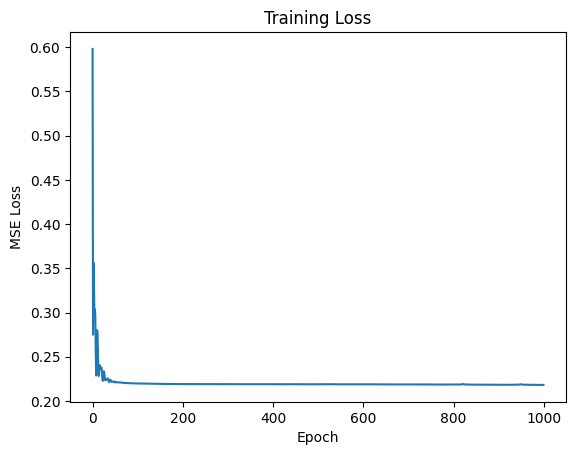

In [7]:
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()

### <a id='toc2_6_'></a>[Noise Addition](#toc0_)

In [8]:
noise = np.random.uniform(-0.1, 0.1, y_train.shape)
y_noisy = y_train + noise
# input= np.sin(2*time)

y_noisy_tensor = torch.tensor(y_noisy, dtype=torch.float32).unsqueeze(1)

In [9]:
u_pred = model(y_noisy_tensor).detach().numpy()

### <a id='toc2_7_'></a>[Plot and Compare](#toc0_)

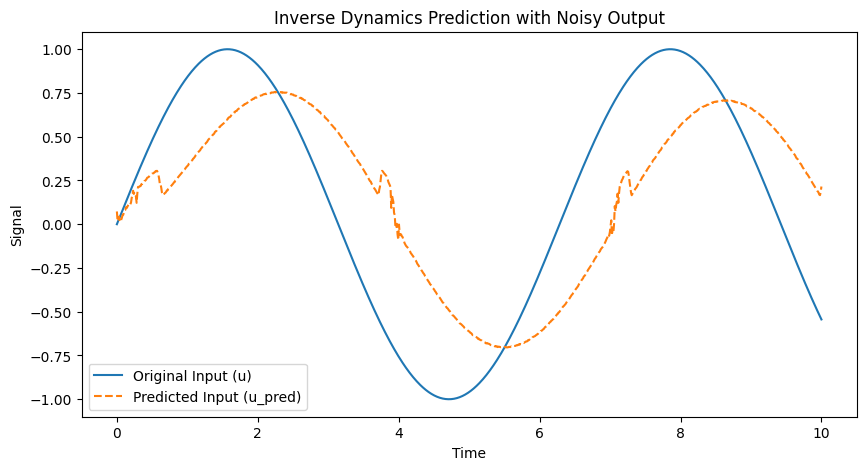

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(time, u_train, label="Original Input (u)")
plt.plot(time, u_pred, label="Predicted Input (u_pred)", linestyle='dashed')
plt.title("Inverse Dynamics Prediction with Noisy Output")
plt.xlabel("Time")
plt.ylabel("Signal")
plt.legend()
plt.show()

In [11]:
# # Define the desired reference signal
# r = np.sin(2*time)  # Desired trajectory

# # Compute error and apply feedback control
# K_p = 10  # Proportional gain
# y_controlled = []  # Controlled system output
# u_controlled = []  # Control input

# y_prev = 0  # Initial system output
# dt = 0.01  # Time step
# for t in range(len(time)):
#     # Compute the tracking error
#     e = r[t] - y_prev

#     # Feedforward input from the inverse model
#     u_pred_ff = model(torch.tensor([[r[t]]], dtype=torch.float32)).item()
    
#     # Feedback control
#     u = u_pred_ff + K_p * e
#     u_controlled.append(u)

#     # Simulate system with the control input
#     if t == 0:
#         y_prev = system.output([u], dt=dt)[0]  # Initialize output
#     else:
#         y_prev = system.output([u], dt=dt)[-1]
    
#     y_controlled.append(y_prev)

# # Convert results to numpy for plotting
# y_controlled = np.array(y_controlled)
# u_controlled = np.array(u_controlled)

# # Plot the results
# plt.figure(figsize=(12, 5))
# plt.subplot(2, 1, 1)
# plt.plot(time, r, label="Desired Output (r)")
# plt.plot(time, y_controlled, label="Controlled Output (y_controlled)", linestyle="dashed")
# plt.title("System Output with Inverse Dynamics Control")
# plt.xlabel("Time")
# plt.ylabel("Output")
# plt.legend()

# plt.subplot(2, 1, 2)
# plt.plot(time, u_controlled, label="Control Input (u)")
# plt.title("Control Input Over Time")
# plt.xlabel("Time")
# plt.ylabel("Input")
# plt.legend()

# plt.tight_layout()
# plt.show()

## <a id='toc3_1_'></a>[New H(s)](#toc0_)